In [16]:
from src.sga import SGA
from src.fitnessfunction import ObjectiveSine, ObjectiveLinReg
from src.lin_reg import LinReg
import numpy as np
import matplotlib.pyplot as plot

## Sine fitness function

In [17]:
def plot_sin(population):
    # Sine wave
    x1 = np.arange(1, 128, 0.1)
    y1 = np.sin(x1)

    # Individuals
    x2 = [individual.value for individual in population.individuals]
    y2 = [individual.fitness for individual in population.individuals]

    plot.plot(x1, y1)
    plot.scatter(x2, y2)
    plot.show()

### Run simulation, maximize.

In [18]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 5,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [19]:
sga = SGA(**params_sine)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: -0.0066548042721754075
Generation 1 avg. fitness: 0.7599955713123596
Generation 2 avg. fitness: 0.9224647991176091
Generation 3 avg. fitness: 0.9646592139587815
Generation 4 avg. fitness: 0.982593117043371
Generation 5 avg. fitness: 0.9894083875555576
[0 1 0 1 1 0 1 1 0 0 0 1 1 1 0] 45.5546875 0.9999987295456897


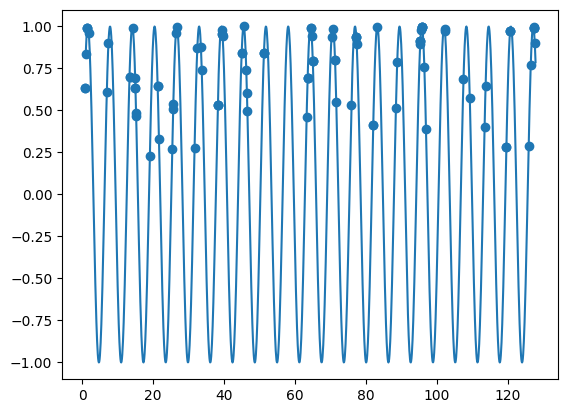

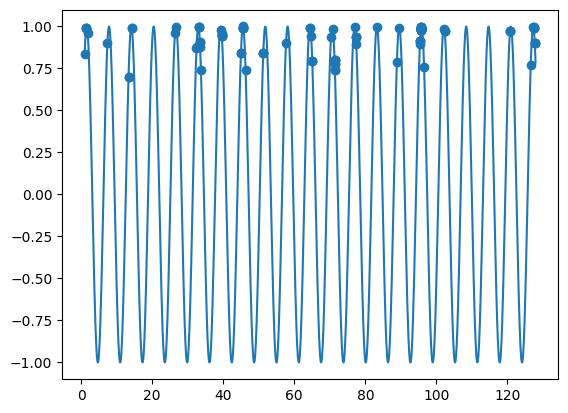

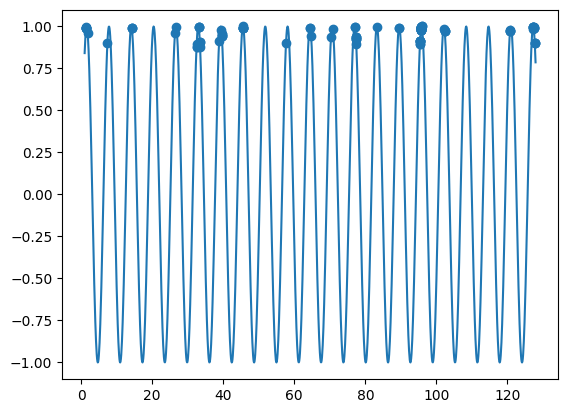

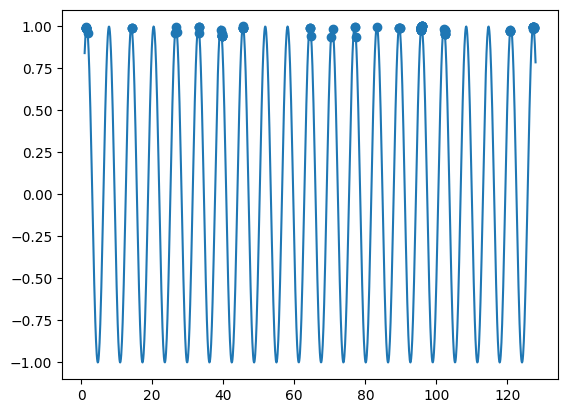

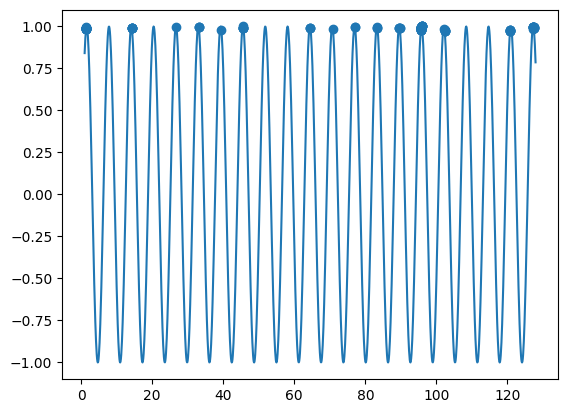

In [20]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint

In [21]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: 0.038194598829063224
Generation 1 avg. fitness: 0.6547645833234363
Generation 2 avg. fitness: 0.8751833817404937
Generation 3 avg. fitness: 0.9590065345014707
Generation 4 avg. fitness: 0.9704416405077761
Generation 5 avg. fitness: 0.9791816529385718
Could not find a solution that satisfies the constraint


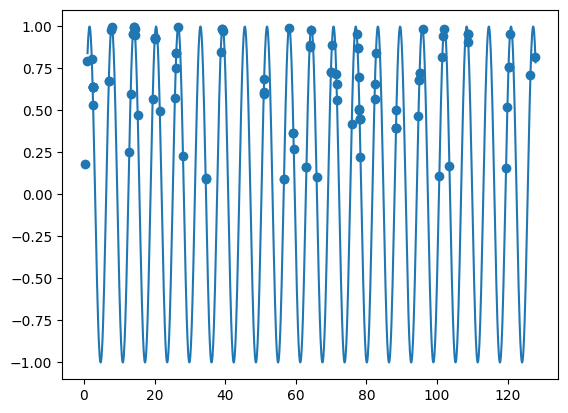

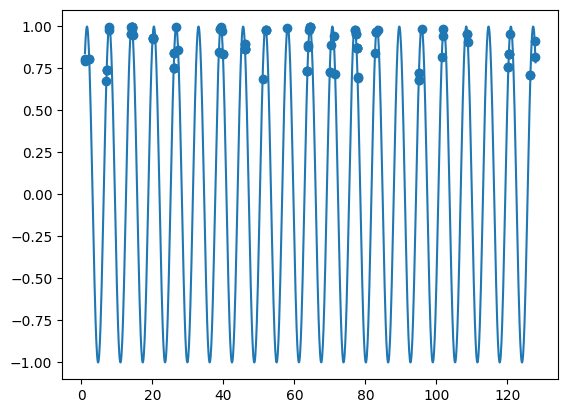

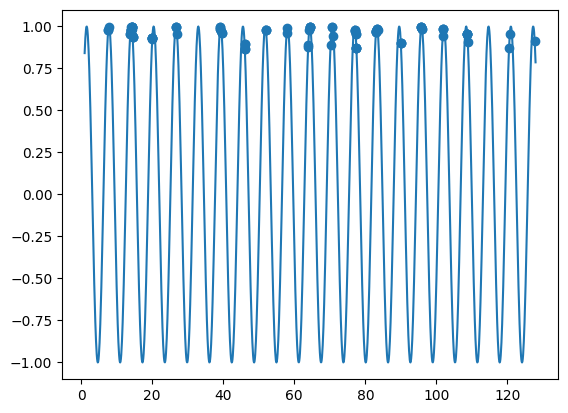

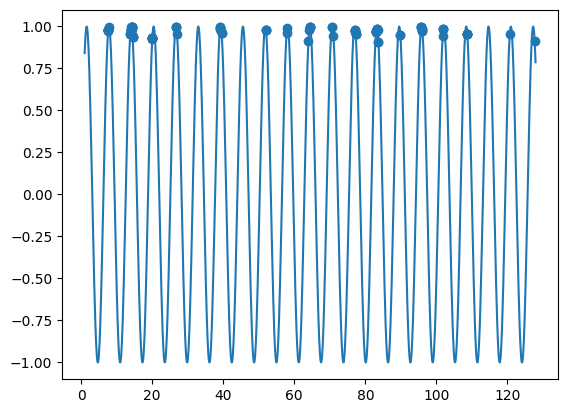

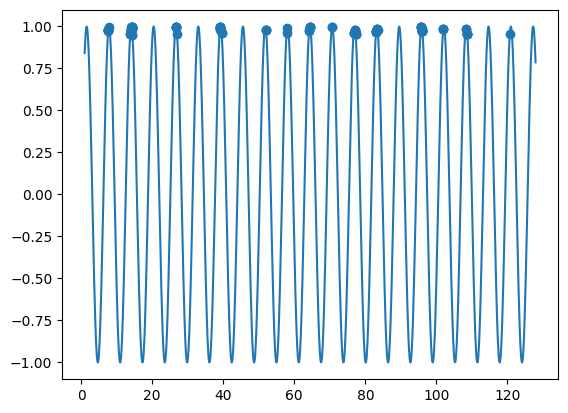

In [22]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint and crowding

In [23]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 15,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
    "survivor_selection_type": "restricted_tournament"
}

In [24]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: 0.08458739580591638
Generation 1 avg. fitness: 0.024279627860847412
Generation 2 avg. fitness: 0.11343863079811589
Generation 3 avg. fitness: 0.22978909225633543
Generation 4 avg. fitness: 0.351187714538042
Generation 5 avg. fitness: 0.45974997879680485
Generation 6 avg. fitness: 0.5645995542058072
Generation 7 avg. fitness: 0.7446648130002089
Generation 8 avg. fitness: 0.6829195678845861
Generation 9 avg. fitness: 0.7499216726574051
Generation 10 avg. fitness: 0.7613256387589121
Generation 11 avg. fitness: 0.7719368522160582
Generation 12 avg. fitness: 0.7343495813364335
Generation 13 avg. fitness: 0.8496458989441023
Generation 14 avg. fitness: 0.872949977706423
Generation 15 avg. fitness: 0.8937195011183888
Could not find a solution that satisfies the constraint


## Linear regression of dataset

In [25]:
# Load dataset
data_path = r"./data/dataset.txt"
df = np.genfromtxt(data_path, delimiter=",")
y = df[:, -1]
X = np.delete(df, -1, axis=1)

seed = 99
# seed = None

### Run the simulation, Minimize

In [26]:
# Run on entire dataset
linreg_err = LinReg().get_fitness(X, y, seed)
print(f"RMSE entire dataset: {linreg_err}")

RMSE entire dataset: 0.13530625063199608


In [27]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [28]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.13575032521704172
Generation 1 avg. fitness: 0.1332511648184546
Generation 2 avg. fitness: 0.13176756037421536
Generation 3 avg. fitness: 0.13054228002404772
Generation 4 avg. fitness: 0.12962308156721555
Generation 5 avg. fitness: 0.12866222261263074
Generation 6 avg. fitness: 0.12809375984222146
Generation 7 avg. fitness: 0.12754137125453163
Generation 8 avg. fitness: 0.12700687639520022
Generation 9 avg. fitness: 0.1265362730098668
Generation 10 avg. fitness: 0.1261451977783807
Generation 11 avg. fitness: 0.12578649764879996
Generation 12 avg. fitness: 0.12533357673377996
Generation 13 avg. fitness: 0.12499014023715914
Generation 14 avg. fitness: 0.1247045972919934
Generation 15 avg. fitness: 0.1244384657608736
Generation 16 avg. fitness: 0.12423723283837541
Generation 17 avg. fitness: 0.12397674364990122
Generation 18 avg. fitness: 0.12376912247545518
Generation 19 avg. fitness: 0.12358157098249987
Generation 20 avg. fitness: 0.12338914883211421
Generat

In [29]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
    "survivor_selection_type": "restricted_tournament"
}

In [30]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.13619351966727403
Generation 1 avg. fitness: 0.1340755065474539
Generation 2 avg. fitness: 0.1327367263276451
Generation 3 avg. fitness: 0.13150156328365467
Generation 4 avg. fitness: 0.13033376541475794
Generation 5 avg. fitness: 0.12950569782028176
Generation 6 avg. fitness: 0.12884633951570046
Generation 7 avg. fitness: 0.12814176433103586
Generation 8 avg. fitness: 0.12747824972671917
Generation 9 avg. fitness: 0.1270398890986795
Generation 10 avg. fitness: 0.12656578683418715
Generation 11 avg. fitness: 0.12611115418685673
Generation 12 avg. fitness: 0.12574890983727538
Generation 13 avg. fitness: 0.1253705829574086
Generation 14 avg. fitness: 0.12503173639100504
Generation 15 avg. fitness: 0.12477710258257076
Generation 16 avg. fitness: 0.12449097040681065
Generation 17 avg. fitness: 0.1242273264411041
Generation 18 avg. fitness: 0.12389861099608848
Generation 19 avg. fitness: 0.12374661583926991
Generation 20 avg. fitness: 0.12355592801513753
Generat